Here I add forums and articles posts.   
This follows the same steps as the previous notebook (improve-lda-model.ipynb)

In [1]:
import pandas as pd
import os
import numpy as np
from gensim import corpora, models, similarities
from gensim import models

from nlp_models import make_corpus,\
make_lsi_similarity_matrix,make_lda_similarity_matrix,get_model_score_wforums

In [2]:
# Set up paths/ os
import os
import sys

this_path=os.getcwd()
os.chdir("../data")
sys.path.insert(0, this_path)

In [3]:

# Read dataframe
#input_fname="AutismParentMagazine-posts-tokens.csv"
input_fname="articles-n-forums-posts.csv"


# Get categories and ids from dataset
df = pd.read_csv(input_fname,index_col=0)

df.head(2)

,category,href,source,text,title,tokens
0,['category-autism-therapy'],https://www.autismparentingmagazine.com/autism...,https://www.autismparentingmagazine.com/,For children with autism spectrum disorder (AS...,"Autism, Head Banging and other Self Harming Be...","['for', 'children', 'with', 'autism', 'spectru..."
1,['category-autism-therapy'],https://www.autismparentingmagazine.com/high-q...,https://www.autismparentingmagazine.com/,Dr. Stephen Shore once said “If you’ve met one...,High Quality ABA Treatment: What Every Parent...,"['dr', 'stephen', 'shore', 'once', 'said', 'if..."


In [4]:
# Extract series from df:
categories=df['category']
titles=df['title']
ids=df.index

In [5]:
from ast import literal_eval  

# Get similarity matrices
documents = df['tokens'].values
for idoc in range(len(documents)):
    documents[idoc]=literal_eval(str(documents[idoc]))



In [6]:
#corpus,dictionary = make_corpus(documents)
#tfidf = models.TfidfModel(corpus)
#Save corpus into file
import pickle

tfidf_fname='tfidf.save'
dictionary_fname='dictionary.save'
corpus_fname='corpus.save'

# Read models and evaluate the score
corpus = pickle.load(open(corpus_fname, "rb"))
tfidf = models.TfidfModel.load(tfidf_fname)
dictionary = pickle.load(open(dictionary_fname, "rb"))



In [7]:
print("LSI model")

for num_topics in range(10,100,10):
    matsim,lsi = make_lsi_similarity_matrix(tfidf[corpus], dictionary, num_topics)
    model_score= get_model_score_wforums(ids,matsim,categories,titles)
    print("N. topics {}, score {}".format(num_topics,model_score))


LSI model
N. topics 10, score 0.32
N. topics 20, score 0.3333333333333333
N. topics 30, score 0.36
N. topics 40, score 0.30666666666666664
N. topics 50, score 0.3466666666666667
N. topics 60, score 0.41333333333333333
N. topics 70, score 0.38666666666666666
N. topics 80, score 0.37333333333333335
N. topics 90, score 0.36


In [9]:
save=True
num_iter=500
x=[]
y=[]
for num_topics in range(10,200,10):
    matsim,lda = make_lda_similarity_matrix(corpus, dictionary,num_topics,num_iter)
    model_score= get_model_score_wforums(ids,matsim,categories,titles)
    if save:
        fname="lda-matsim-{}.save".format(num_topics)
        pickle.dump(matsim,open(fname,"wb"))
        fname='lda-model-{}.save'.format(num_topics)
        lda.save(fname)

    print("N. topics {}, score {}".format(num_topics,model_score))
    x.append(num_topics)
    y.append(model_score)


N. topics 10, score 0.42424242424242425
N. topics 20, score 0.2
N. topics 30, score 0.2682926829268293
N. topics 40, score 0.4358974358974359
N. topics 50, score 0.2222222222222222
N. topics 60, score 0.5
N. topics 70, score 0.23529411764705882
N. topics 80, score 0.42857142857142855
N. topics 90, score 0.4
N. topics 100, score 0.5
N. topics 110, score 0.125
N. topics 120, score 0.44
N. topics 130, score 0.2
N. topics 140, score 0.6666666666666666
N. topics 150, score 0.0
N. topics 160, score 0.0
N. topics 170, score 0.625
N. topics 180, score 1.0
N. topics 190, score 0.16666666666666666


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from matplotlib import gridspec
from scipy.stats import norm
from scipy.optimize import curve_fit
from lognormal import lognormal, lognormal_stats
import numpy as np

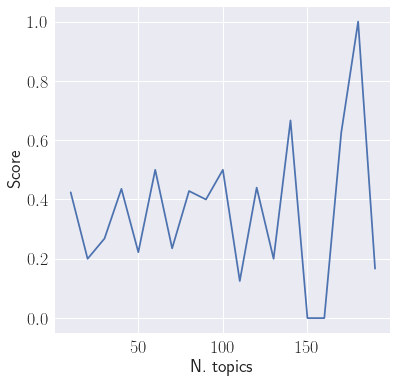

In [11]:
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True

plt.rcParams.update({'font.size': 24})
label_size = 18
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 


fig = plt.figure()
fig.set_size_inches(6,6)

plt.xlabel('N. topics',fontsize=label_size)
plt.ylabel('Score',fontsize=label_size)


plt.plot(x, y)

plt.show()